In [1]:
 !pip install transformers

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/3-classes-bangla-sa/3_classes_Bert_Preprocessed__Dataset.xlsx


In [5]:
df=pd.read_excel('/kaggle/input/3-classes-bangla-sa/3_classes_Bert_Preprocessed__Dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15728 entries, 0 to 15727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15728 non-null  int64 
 1   Data        15728 non-null  object
 2   Label       15728 non-null  int64 
 3   Token       15728 non-null  object
 4   Token_ID    15728 non-null  object
dtypes: int64(2), object(3)
memory usage: 614.5+ KB


In [6]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 39.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.0-py3-none-any.whl size=25313832 sha256=af379abfc29118da5bfeb2f3042c545b15df1b949706263dbaab7e995f31ae14
  Stored in directory: /root/.cache/pip/wheels/cb/c2/1a/db7e1066fb4a94becc327ec359a493a8899089609d5569

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [8]:
import ktrain
from ktrain import text

In [9]:
#df_filtered = df[df['Label'] > 0]
#df=df_filtered

In [10]:
df.Label.value_counts(), len(df)

(1    6410
 2    5709
 0    3609
 Name: Label, dtype: int64,
 15728)

In [11]:
def Label(label):
    if(label==1):
        return 'positive'
    elif(label==0):
        return 'neutral'
    elif(label==2):
        return 'negative'
df['Sentiment'] = df['Label'].apply(Label)
df.Sentiment.value_counts(), len(df)

(positive    6410
 negative    5709
 neutral     3609
 Name: Sentiment, dtype: int64,
 15728)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
encoded_labels = le.transform(df['Label'])
labels = np.array(encoded_labels) # Converting into numpy array
class_names =le.classes_
print(class_names)

In [12]:
df.Sentiment.value_counts(), len(df)

(positive    6410
 negative    5709
 neutral     3609
 Name: Sentiment, dtype: int64,
 15728)

In [13]:
df.head()

,Unnamed: 0,Data,Label,Token,Token_ID,Sentiment
0,4032,এক মাস সেহেরি খাইয়া রোজা রাহা সোজা,1,"['এক', 'মাস', 'সে', '##হের', '##ি', '[UNK]', '...","[788, 1293, 809, 2685, 416, 1, 12209, 3462, 41...",positive
1,3587,ভাই আমাদের মাতৃভুমিটা এত সুনদর,1,"['ভাই', 'আমাদের', 'মাতৃ', '##ভু', '##মিট', '##...","[1352, 1029, 6563, 12357, 12290, 415, 1284, 36...",positive
2,8968,জানুয়ারীতে কেন ঐ সময় স্পেশাল কি,1,"['[UNK]', 'কেন', 'ঐ', '[UNK]', 'স্পেশাল', 'কি']","[1, 1107, 218, 1, 10225, 817]",positive
3,95,তোরা কখন কাচা রসুন চাবিয়ে খেয়ে দেখেচিস,2,"['তোরা', 'কখন', 'কাচা', 'রসুন', '[UNK]', '[UNK...","[5712, 1394, 30306, 18173, 1, 1, 1172, 2408, 417]",negative
4,1163,হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ জীবন টা বেদনা,2,"['হ্যাঁ', 'হ্যাঁ', 'হ্যাঁ', 'হ্যাঁ', 'জীবন', '...","[2154, 2154, 2154, 2154, 1537, 1632, 10018]",negative


In [14]:
train=df[:int(.8*len(df))]
test=df[int(.8*len(df)):int(.9*len(df))]
validation=df[int(.9*len(df)):]
x_train=train['Token'].tolist()
y_train=train['Label'].tolist()
x_validation=validation['Token'].tolist()
y_validation=validation['Label'].tolist()
x_test=test['Token'].tolist()
y_test=test['Label'].tolist()

In [15]:
x_train= np.array(x_train)
x_validation= np.array(x_validation)
x_test= np.array(x_test)


In [16]:
categories = [0,1,2]

In [17]:
model_name = 'bert-base-multilingual-uncased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953M [00:00<?, ?B/s]

In [18]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


In [19]:
model = trans.get_classifier()

In [20]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [21]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(3)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1048/1048 [==============================] - 214s 183ms/step - loss: 1.0704 - accuracy: 0.4080
Epoch 2/10
1048/1048 [==============================] - 197s 188ms/step - loss: 1.0381 - accuracy: 0.4578
Epoch 3/10
1048/1048 [==============================] - 196s 187ms/step - loss: 0.9268 - accuracy: 0.5735
Epoch 4/10
1048/1048 [==============================] - 195s 186ms/step - loss: 0.9384 - accuracy: 0.5587
Epoch 5/10
1048/1048 [==============================] - 194s 185ms/step - loss: 1.0890 - accuracy: 0.3843
Epoch 6/10
1048/1048 [==============================] - 195s 186ms/step - loss: 1.0952 - accuracy: 0.3886
Epoch 7/10
1048/1048 [==============================] - 192s 183ms/step - loss: 3.5184 - accuracy: 0.3734
Epoch 8/10
1048/1048 [==============================] - 0s 171us/step - loss: 11.6270 - accuracy: 0.4583


done.
Visually inspect loss plot and select learning rate associated

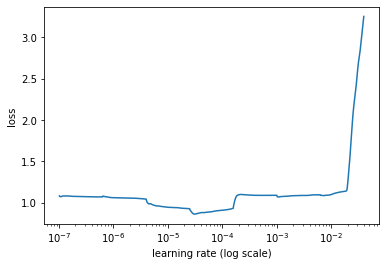

In [22]:
learner.lr_find(show_plot = True,max_epochs=10)

In [23]:
learner.fit_onecycle(5e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/10
1049/1049 [==============================] - 222s 196ms/step - loss: 1.0327 - accuracy: 0.4641 - val_loss: 0.9044 - val_accuracy: 0.5766
Epoch 2/10
1049/1049 [==============================] - 200s 190ms/step - loss: 0.9077 - accuracy: 0.5843 - val_loss: 0.9030 - val_accuracy: 0.5874
Epoch 3/10
1049/1049 [==============================] - 200s 190ms/step - loss: 0.8585 - accuracy: 0.6242 - val_loss: 0.8590 - val_accuracy: 0.5976
Epoch 4/10
1049/1049 [==============================] - 199s 190ms/step - loss: 0.8070 - accuracy: 0.6523 - val_loss: 0.8714 - val_accuracy: 0.6071
Epoch 5/10
1049/1049 [==============================] - 199s 190ms/step - loss: 0.7687 - accuracy: 0.6720 - val_loss: 0.8438 - val_accuracy: 0.6338
Epoch 6/10
1049/1049 [==============================] - 199s 190ms/step - loss: 0.6965 - accuracy: 0.7128 - val_loss: 0.9656 - val_accuracy: 0.5626
Epoch 7/10
1049/1049 [===========================

In [24]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

           0       0.45      0.46      0.45       380
           1       0.70      0.69      0.69       623
           2       0.72      0.72      0.72       570

    accuracy                           0.64      1573
   macro avg       0.62      0.62      0.62      1573
weighted avg       0.65      0.64      0.65      1573



array([[174, 118,  88],
       [122, 432,  69],
       [ 91,  71, 408]])

In [25]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [26]:
y_pred_mbert_uncased = predictor.predict(x_test)
#print(y_pred)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mbert_uncased))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49       364
           1       0.73      0.73      0.73       659
           2       0.74      0.71      0.73       550

    accuracy                           0.67      1573
   macro avg       0.65      0.65      0.65      1573
weighted avg       0.67      0.67      0.67      1573



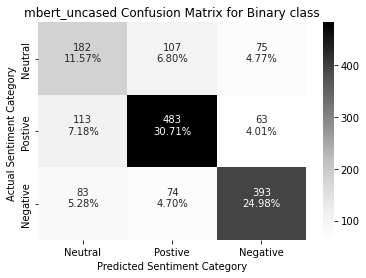

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_mbert_uncased)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('mbert_uncased Confusion Matrix for Binary class');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['Neutral','Postive', 'Negative'])
ax.yaxis.set_ticklabels(['Neutral','Postive', 'Negative'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('mbert_uncased Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [29]:
model_name = 'monsoon-nlp/bangla-electra'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.6M [00:00<?, ?B/s]

In [30]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


Downloading:   0%|          | 0.00/161 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


In [31]:
model = trans.get_classifier()

In [32]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [33]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(3)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1048/1048 [==============================] - 86s 64ms/step - loss: 1.0930 - accuracy: 0.4046
Epoch 2/10
1048/1048 [==============================] - 67s 64ms/step - loss: 1.0842 - accuracy: 0.4081
Epoch 3/10
1048/1048 [==============================] - 67s 64ms/step - loss: 1.0664 - accuracy: 0.4079
Epoch 4/10
1048/1048 [==============================] - 67s 64ms/step - loss: 1.0293 - accuracy: 0.4828
Epoch 5/10
1048/1048 [==============================] - 68s 65ms/step - loss: 1.0486 - accuracy: 0.4496
Epoch 6/10
1048/1048 [==============================] - 67s 64ms/step - loss: 1.0776 - accuracy: 0.3936
Epoch 7/10
1048/1048 [==============================] - 66s 63ms/step - loss: 1.0785 - accuracy: 0.3974
Epoch 8/10
1048/1048 [==============================] - 66s 63ms/step - loss: 1.0845 - accuracy: 0.3868
Epoch 9/10
1048/1048 [==============================] - 67s 64ms/step - loss: 1.1307 

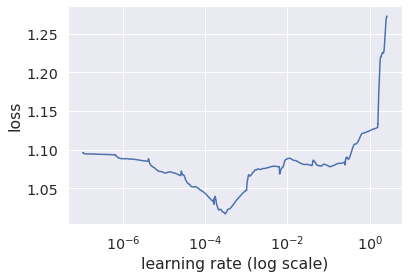

In [34]:
learner.lr_find(show_plot = True,max_epochs=10)

In [35]:
learner.fit_onecycle(1e-4,10,class_weight=weight) 



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
1049/1049 [==============================] - 92s 71ms/step - loss: 1.0904 - accuracy: 0.3835 - val_loss: 1.0705 - val_accuracy: 0.4113
Epoch 2/10
1049/1049 [==============================] - 69s 66ms/step - loss: 1.0219 - accuracy: 0.5174 - val_loss: 0.9694 - val_accuracy: 0.5524
Epoch 3/10
1049/1049 [==============================] - 70s 66ms/step - loss: 0.9415 - accuracy: 0.5784 - val_loss: 0.9200 - val_accuracy: 0.5804
Epoch 4/10
1049/1049 [==============================] - 69s 66ms/step - loss: 0.8751 - accuracy: 0.6131 - val_loss: 0.8816 - val_accuracy: 0.5969
Epoch 5/10
1049/1049 [==============================] - 70s 66ms/step - loss: 0.8107 - accuracy: 0.6569 - val_loss: 0.8816 - val_accuracy: 0.6001
Epoch 6/10
1049/1049 [==============================] - 69s 66ms/step - loss: 0.7356 - accuracy: 0.6897 - val_loss: 0.8740 - val_accuracy: 0.6084
Epoch 7/10
1049/1049 [==============================] - 70s 

In [36]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [37]:
y_pred_monsoon = predictor.predict(x_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_monsoon))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47       364
           1       0.76      0.67      0.72       659
           2       0.73      0.70      0.72       550

    accuracy                           0.65      1573
   macro avg       0.64      0.64      0.63      1573
weighted avg       0.67      0.65      0.66      1573



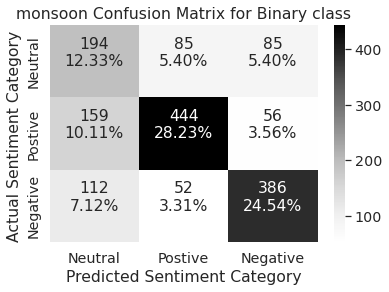

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_monsoon)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('monsoon Confusion Matrix for ternary class');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['Neutral','Postive', 'Negative'])
ax.yaxis.set_ticklabels(['Neutral','Postive', 'Negative'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('3 Confusion Matrix monsoon.png', bbox_inches = "tight")
plt.show()

In [56]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

In [57]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


In [58]:
model = trans.get_classifier()

In [59]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [60]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(3)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1048/1048 [==============================] - 217s 189ms/step - loss: 1.0789 - accuracy: 0.3891
Epoch 2/10
1048/1048 [==============================] - 200s 191ms/step - loss: 1.0557 - accuracy: 0.4356
Epoch 3/10
1048/1048 [==============================] - 200s 191ms/step - loss: 0.9728 - accuracy: 0.5407
Epoch 4/10
1048/1048 [==============================] - 199s 190ms/step - loss: 1.0763 - accuracy: 0.3963
Epoch 5/10
1048/1048 [==============================] - 199s 190ms/step - loss: 1.0834 - accuracy: 0.3916
Epoch 6/10
1048/1048 [==============================] - 199s 190ms/step - loss: 1.1020 - accuracy: 0.3858
Epoch 7/10
1048/1048 [==============================] - 199s 190ms/step - loss: 3.9060 - accuracy: 0.3601
Epoch 8/10
1048/1048 [==============================] - 1s 398us/step - loss: 7.1687 - accuracy: 0.3333


done.
Visually inspect loss plot and select learning rate associated 

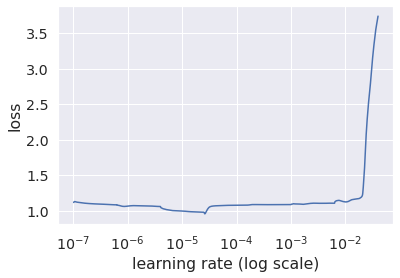

In [61]:
learner.lr_find(show_plot = True,max_epochs=10)

In [62]:
learner.fit_onecycle(1e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
1049/1049 [==============================] - 227s 200ms/step - loss: 1.0747 - accuracy: 0.4131 - val_loss: 1.0157 - val_accuracy: 0.5029
Epoch 2/10
1049/1049 [==============================] - 205s 195ms/step - loss: 0.9820 - accuracy: 0.5283 - val_loss: 0.9207 - val_accuracy: 0.5512
Epoch 3/10
1049/1049 [==============================] - 205s 195ms/step - loss: 0.9037 - accuracy: 0.5858 - val_loss: 0.8565 - val_accuracy: 0.6122
Epoch 4/10
1049/1049 [==============================] - 205s 196ms/step - loss: 0.8452 - accuracy: 0.6227 - val_loss: 0.8574 - val_accuracy: 0.6141
Epoch 5/10
1049/1049 [==============================] - 205s 195ms/step - loss: 0.7750 - accuracy: 0.6640 - val_loss: 0.8686 - val_accuracy: 0.6058
Epoch 6/10
1049/1049 [==============================] - 205s 195ms/step - loss: 0.6934 - accuracy: 0.7067 - val_loss: 0.8414 - val_accuracy: 0.6459
Epoch 7/10
1049/1049 [===========================

In [63]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

           0       0.48      0.51      0.49       380
           1       0.72      0.69      0.70       623
           2       0.73      0.72      0.73       570

    accuracy                           0.66      1573
   macro avg       0.64      0.64      0.64      1573
weighted avg       0.66      0.66      0.66      1573



array([[194, 104,  82],
       [123, 430,  70],
       [ 91,  67, 412]])

In [64]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [65]:
y_pred_mbert_cased = predictor.predict(x_test)
#print(y_pred)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mbert_cased))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48       364
           1       0.74      0.71      0.73       659
           2       0.72      0.70      0.71       550

    accuracy                           0.66      1573
   macro avg       0.64      0.64      0.64      1573
weighted avg       0.67      0.66      0.66      1573



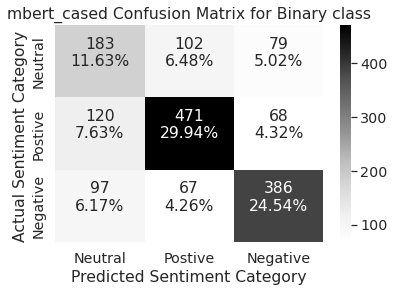

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_mbert_cased)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('mbert_cased Confusion Matrix for Binary class');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['Neutral','Postive', 'Negative'])
ax.yaxis.set_ticklabels(['Neutral','Postive', 'Negative'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('mbert_cased Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [72]:
import pandas as pd
sub_all=pd.DataFrame({'mbert_uncased':y_pred_mbert_uncased,'monsoon':y_pred_monsoon,'mbert_cased':y_pred_mbert_cased})
pred_mode=sub_all.agg('mode',axis=1)[0].values
sub_all.head()

,mbert_uncased,monsoon,mbert_cased
0,1,1,0
1,0,1,2
2,2,2,1
3,2,2,1
4,0,1,0


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_mode))

              precision    recall  f1-score   support

           0       0.47      0.55      0.51       364
           1       0.77      0.74      0.75       659
           2       0.77      0.72      0.74       550

    accuracy                           0.69      1573
   macro avg       0.67      0.67      0.67      1573
weighted avg       0.70      0.69      0.69      1573



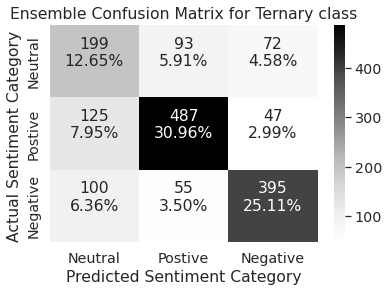

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred_mode)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('Ensemble Confusion Matrix for Ternary class');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['Neutral','Postive', 'Negative'])
ax.yaxis.set_ticklabels(['Neutral','Postive', 'Negative'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('3 Ensemble Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [78]:
df_result= sub_all
df_result['final prediction']= pred_mode
df_result['Actual Sentiment']= test['Sentiment']
df_result['Text']=test['Data'].tolist()
df_result.to_csv('3 classes Ensemble Prediction results.csv', index=True)